In [6]:
import matplotlib.pyplot as plt
import numpy as np
import optimalpartitioning as op

%matplotlib inline

Data generation

In [8]:
def generate_pw_linear_signal(cp_n, n=100, sigma=1, x_range=(0,100), y_range=(0,100)):
  """Generate a random signal with cp_n changepoints.

  cp_n :  number of changepoints
  n : number of samples
  """
 
  cp_idx = np.sort(np.concatenate([[0], np.random.randint(1,n-1,size=cp_n), [n]]))
  cp_x = (cp_idx/n)*(x_range[1]-x_range[0]) + x_range[0]
  cp_y = np.random.uniform(*y_range,size=cp_n+2)

  x = np.linspace(*x_range,n)
  y0 = np.interp(x, cp_x, cp_y)
  y = y0 + np.random.randn(len(x))*sigma
  return x,y,y0,cp_idx[1:-1]

def generate_pw_const_signal(cp_n, n=100, sigma=1, x_range=(0,100), y_range=(0,100)):
  """Generate a random signal with cp_n changepoints.

  cp_n :  number of changepoints
  n : number of samples
  """
 
  cpts_idx = [0] + sorted(np.random.randint(0,n,size=cp_n-1)) + [n]
  cpts_y = np.random.uniform(*y_range,size=cp_n+1)

  x = np.linspace(*x_range,n)
  y = np.zeros(n)
  for i in range(cp_n):
    y[cpts_idx[i]:cpts_idx[i+1]] = cpts_y[i]
  
  y += np.random.randn(len(x))*sigma
  return x,y,cpts_idx[1:-1]


def get_segments(op2Dresult):
  """get plottable segments"""
  points = list(zip(op2Dresult.x, op2Dresult.y))
  return [((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1])) for i in range(0,len(points),2)]

In [9]:
# load example signal
# x,y = np.loadtxt('test/sample_data.txt')

## OP1D

Text(0, 0.5, 'y')

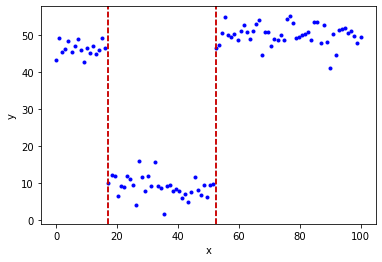

In [177]:
sigma = 3
x,y,cp_real = generate_pw_const_signal(3, sigma=sigma)
plt.plot(x,y,'.b')

result = op.op1D(x, y, penalty=100) # x, y, beta

for cp in cp_real:
  # draw real changepoints
  plt.axvline(x[cp], color='k', ls='--')

for cp in result.cp:
  # draw detected changepoints
  plt.axvline(x[cp], color='r', ls='--')

plt.xlabel('x')
plt.ylabel('y')

without continuity (function `op2`)

changepoints found: [3, 33] real: [ 3 38]


Text(0, 0.5, 'y')

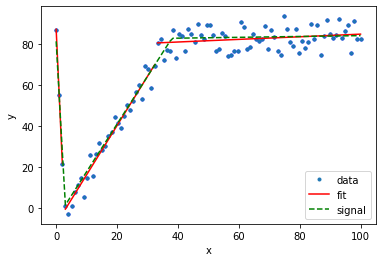

In [182]:
sigma = 5
x,y,y0,cp_real = generate_pw_linear_signal(2, n=100, sigma=sigma)
plt.plot(x,y,'.b')

result = op.op2D(x,y,500) # x, y, beta

print("changepoints found:", result.cp, "real:", cp_real)

plt.plot(x,y,'.', label="data")

for start, end in get_segments(result):
  plt.plot(start, end, "r")

plt.plot([],[],'r', label='fit')

plt.plot(x,y0, "g--", label="signal")
# for cp in cp_real:
#   # draw real changepoints
#   plt.axvline(x[cp], color='g', ls='--')

# for cp in result.cp:
#   # draw detected changepoints
#   plt.axvline(x[cp], color='r', ls='--')

    
plt.legend();


plt.xlabel('x')
plt.ylabel('y')

with continuity (function `op2cc`)

changepoints found: [3, 6, 38] real: [ 3 38]


Text(0, 0.5, 'y')

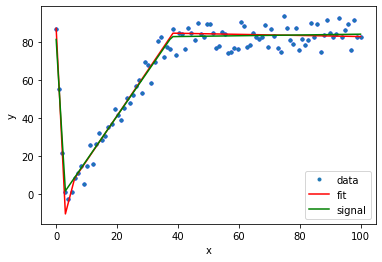

In [183]:
sigma = 2
n=200
# x,y,y0,cp_real = generate_pw_linear_signal(2, n=n, sigma=sigma)
plt.plot(x,y,'.b')

result = op.op2Dcc(x,y,500)

print("changepoints found:", result.cp, "real:", cp_real)

#fig, ax = plt.subplots(figsize=(16,10))
plt.plot(x,y,'.', label="data")

plt.plot(result.x,result.y, "r", label='fit')
plt.plot(x,y0, "g", label="signal")

# for cp in cp_real:
#   # draw real changepoints
#   plt.axvline(x[cp], color='g', ls='--')

# for cp in result.cp:
#   # draw detected changepoints
#   plt.axvline(x[cp], color='r', ls='--')
    
plt.legend();
plt.xlabel('x')
plt.ylabel('y')

In [184]:
print("cost", result.cost)
print("cp index", result.cp)
print("cp x", result.x)
print("xp y", result.y)

cost 4121.556284128602
cp index [3, 6, 38]
cp x [0.0, 3.0303030014038086, 6.060606002807617, 38.38383865356445, 100.0]
xp y [87.41463470458984, -10.553853034973145, 8.177253723144531, 84.86253356933594, 83.09634399414062]
